EDA - exploratory Data Analysis, process of analyzing and summarizing the main characteristics of a dataset, through visual and statistical methods. Here some methods:

# 1. Pandas-Profiling

This method generates html file of data analysis

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv")

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("report.html")

c:\Users\igorv\OneDrive\Documents\GitHub\EDA\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\igorv\AppData\Local\Temp\ipykernel_93536\1575136141.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 497.07it/s]


# 2. SweetViz

In [3]:
import sweetviz as sv
import pandas as pd

# Load your data into a Pandas DataFrame
df = pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv")

# Create an analysis report for your data
report = sv.analyze(df)

# Display the report
report.show_html()

c:\Users\igorv\OneDrive\Documents\GitHub\EDA\.venv\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\igorv\OneDrive\Documents\GitHub\EDA\.venv\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: Month                               |██        | [ 20%]   00:00 -> (00:00 left)c:\Users\igorv\OneDrive\Documents\GitHub\EDA\.venv\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
Feature:  "1958"                           

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 3. D-Tale

In [9]:
import dtale
import pandas as pd

# Load your data into a Pandas DataFrame
df = pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv")

# Start a D-Tale instance for the data
d = dtale.show(df)

# The D-Tale instance is now running in the background, you can access it in your web browser
# at the URL displayed in the output.

In [10]:
d

# 4. Simple EDA

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#  load the dataset
df = pd.read_csv("titanic/train.csv")

# print the first few rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# print the DataFrame's shape
print("shape")
print(df.shape)

# print the DataFrame's data types
print("-------------------")
print(df.dtypes)

# check for missing values
print("missing values")
print(df.isnull().sum())

shape
(891, 12)
-------------------
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
missing values
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


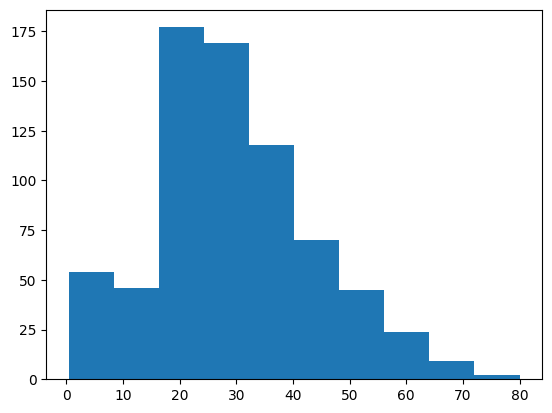

In [7]:
# visualize the distribution of a numeric column
plt.hist(df['Age'])
plt.show()

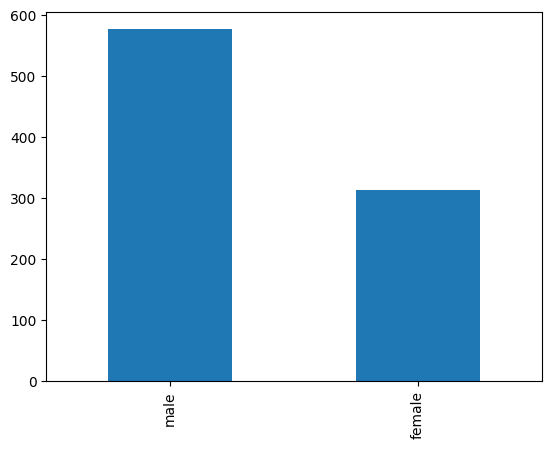

In [8]:
# visualize the distribution of a categorical column
df['Sex'].value_counts().plot(kind='bar')
plt.show()

In [9]:
# calculate basic statistics for a numeric column
print(df['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [10]:
# calculate the correlation between two numeric columns
print(df['Fare'].corr(df['Survived']))

0.2573065223849622


In [11]:
# group the data by a categorical column and calculate statistics
grouped_df = df.groupby('Pclass')['Survived'].mean()
print(grouped_df)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


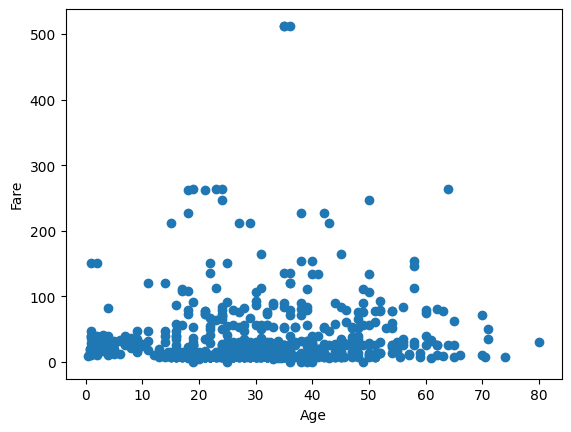

In [12]:
# create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

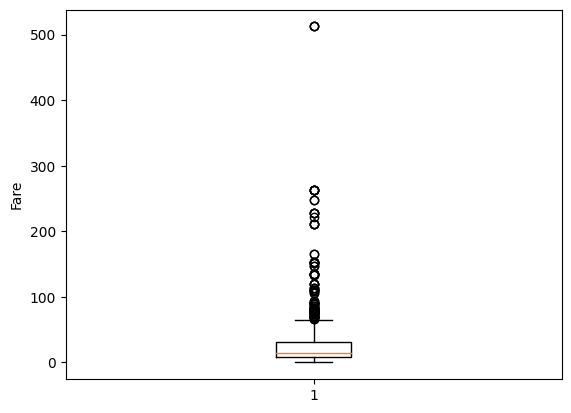

In [13]:
# create a box plot to visualize the distribution of a numeric column
plt.boxplot(df['Fare'])
plt.ylabel('Fare')
plt.show()

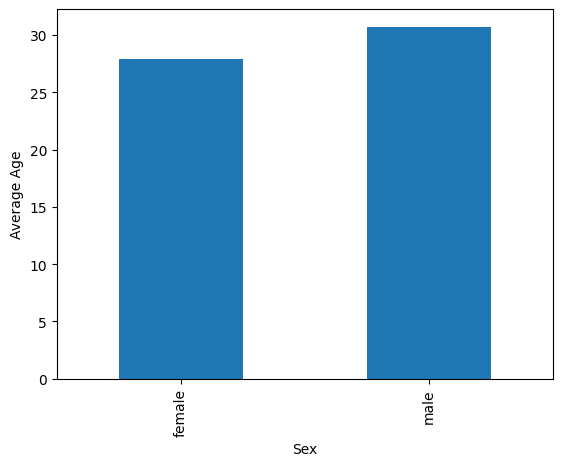

In [14]:
# create a bar plot to visualize the mean of a numeric column for each category of a categorical column
df.groupby('Sex')['Age'].mean().plot(kind='bar')
plt.ylabel('Average Age')
plt.show()

In [15]:
# create a pivot table to summarize the data
pivot_table = df.pivot_table(index='Sex', columns='Pclass', values='Fare', aggfunc='mean')
print(pivot_table)

Pclass           1          2          3
Sex                                     
female  106.125798  21.970121  16.118810
male     67.226127  19.741782  12.661633


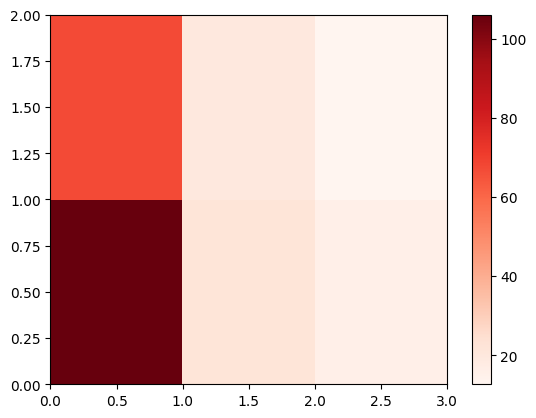

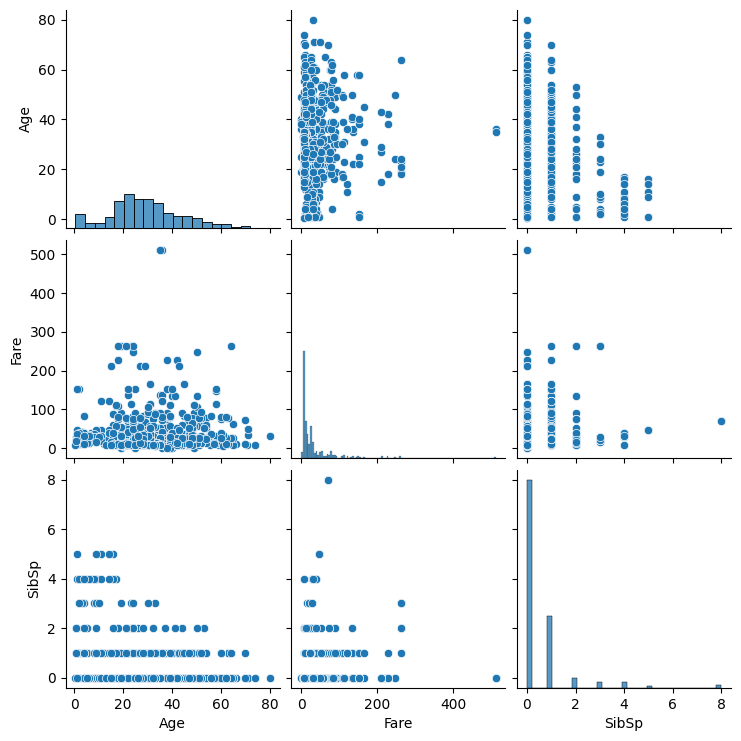

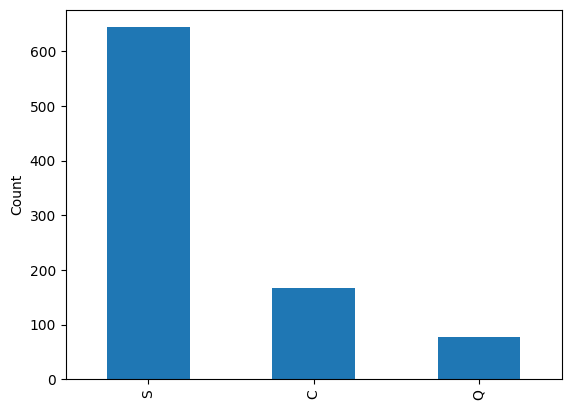

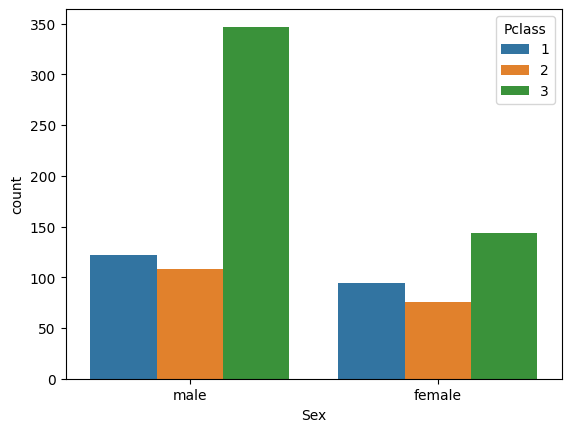

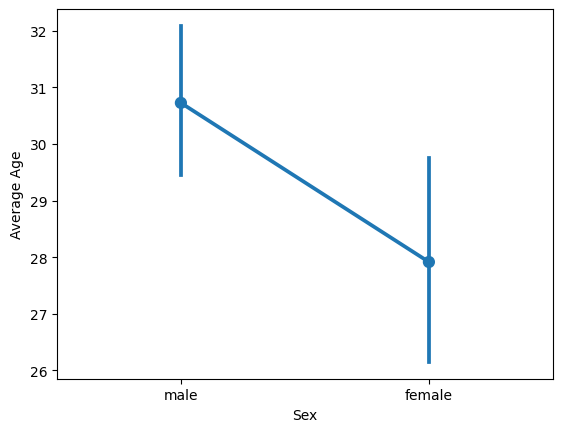

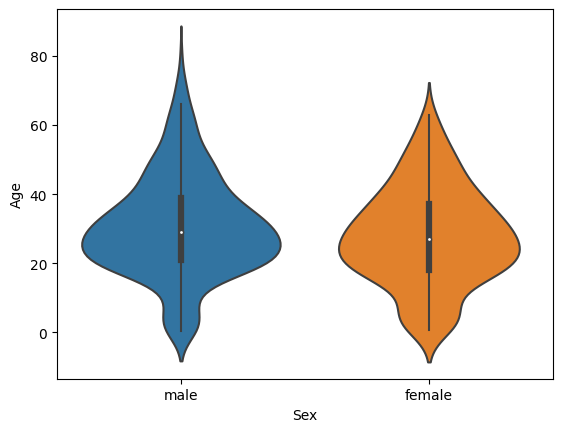

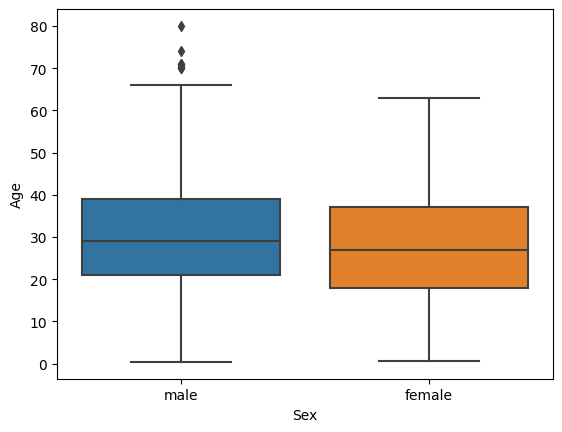

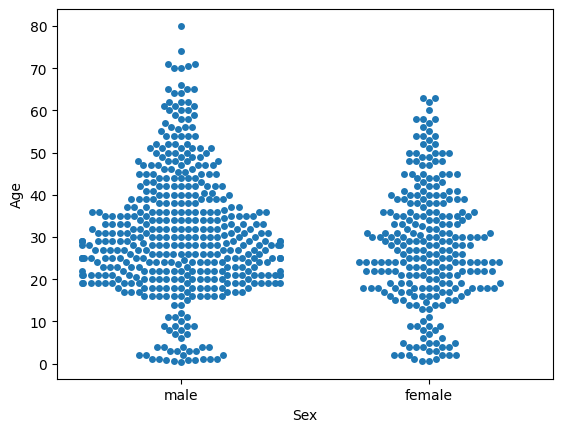

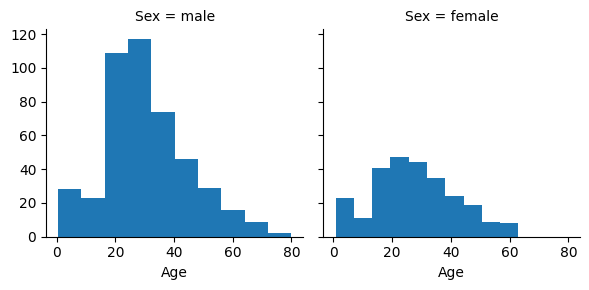

C:\Users\igorv\AppData\Local\Temp\ipykernel_171056\3045171924.py:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)


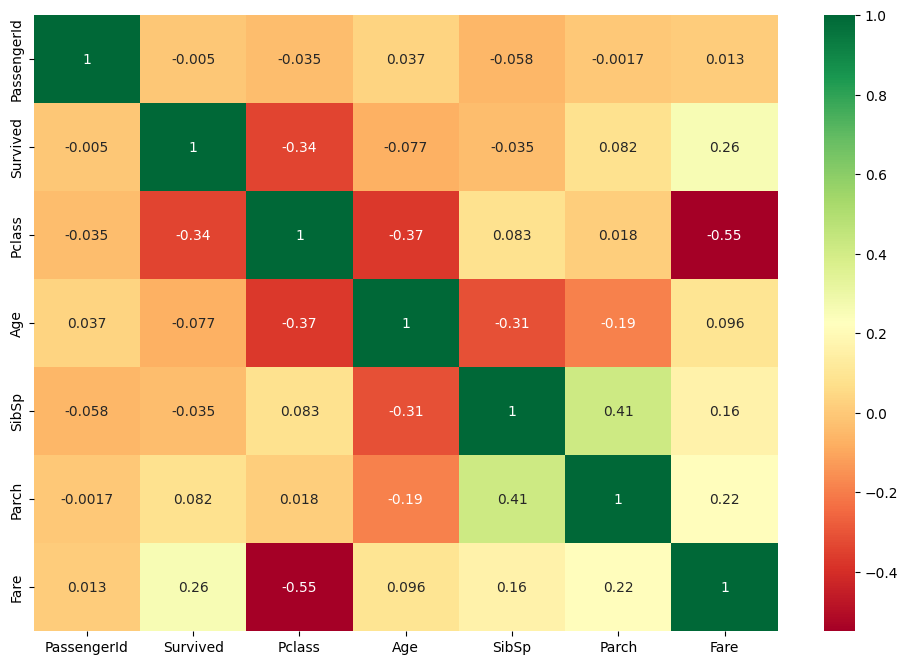

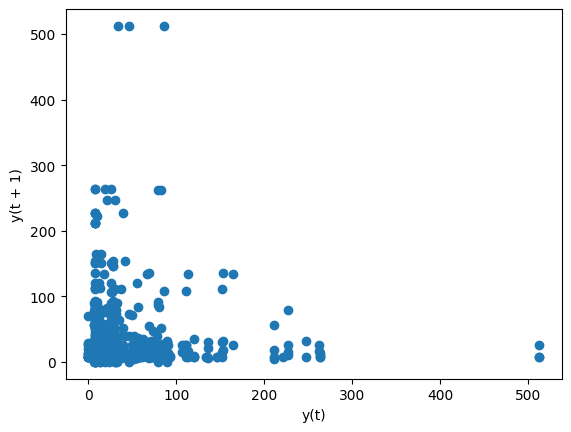

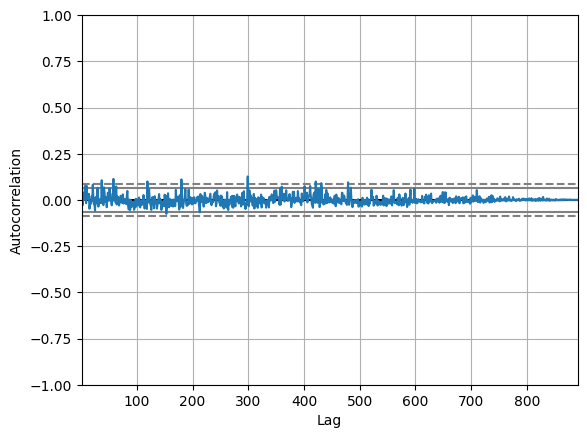

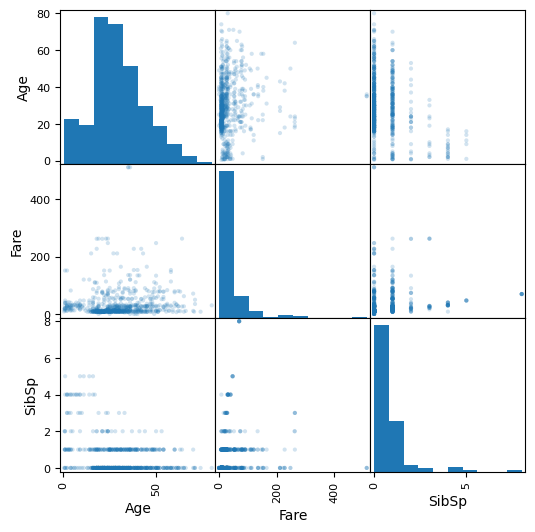

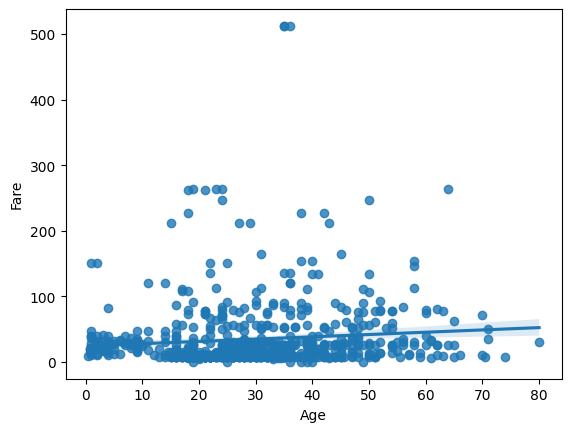

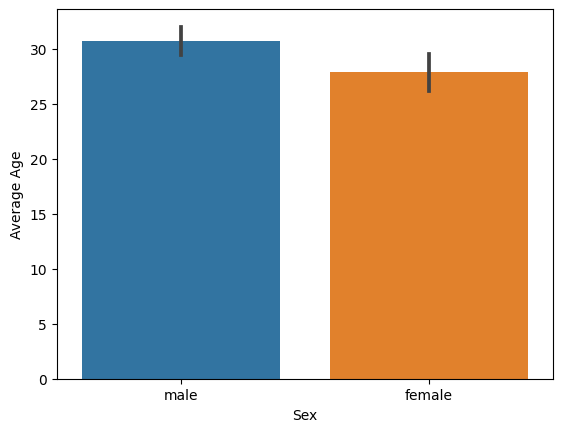

C:\Users\igorv\AppData\Local\Temp\ipykernel_171056\3045171924.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='Sex', y='Age', data=df, ci=95)


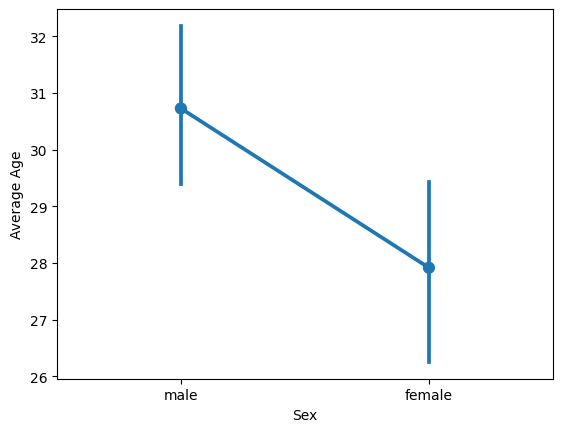

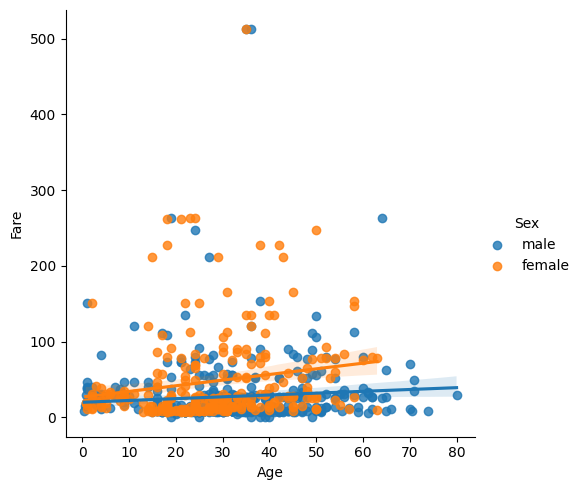

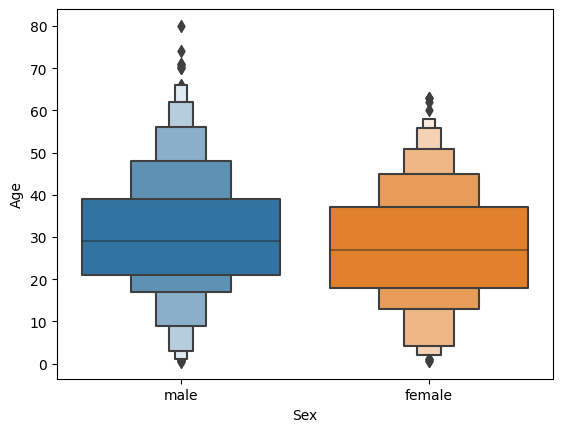

C:\Users\igorv\AppData\Local\Temp\ipykernel_171056\3045171924.py:89: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


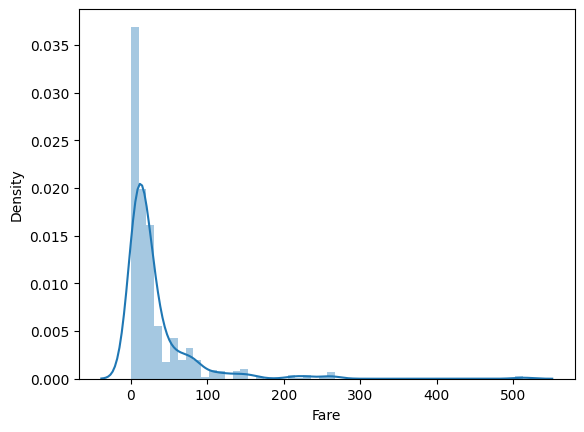

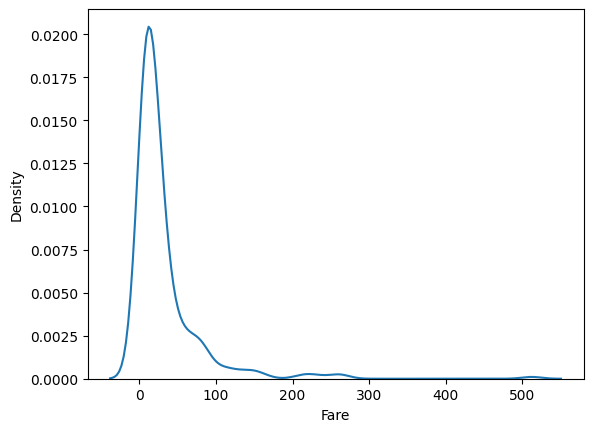

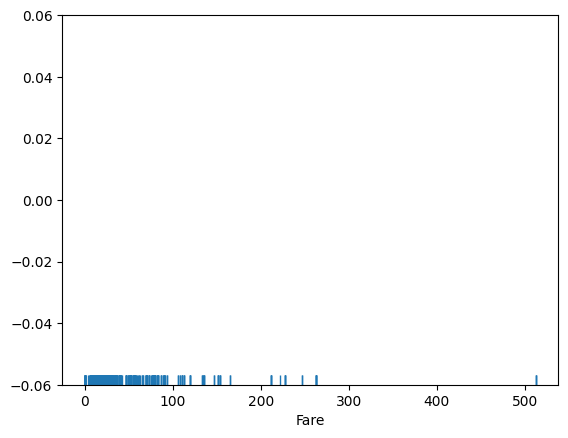

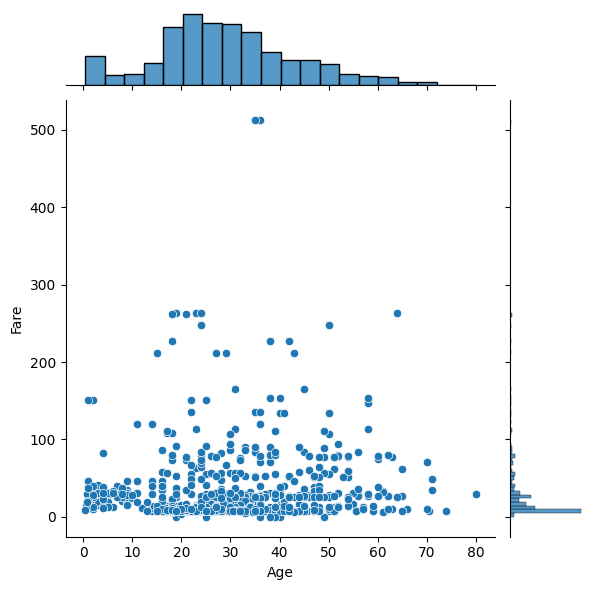

In [17]:
# create a heatmap to visualize the pivot table
plt.pcolor(pivot_table, cmap='Reds')
plt.colorbar()
plt.show()

# create a pairplot to visualize the relationships between multiple numeric columns
import seaborn as sns
sns.pairplot(df, vars=['Age', 'Fare', 'SibSp'])
plt.show()

# create a bar plot to visualize the count of a categorical column
df['Embarked'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

# create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='Sex', hue='Pclass', data=df)
plt.show()

# create a point plot to visualize the mean of a numeric column by the categories of a categorical column
sns.pointplot(x='Sex', y='Age', data=df)
plt.ylabel('Average Age')
plt.show()

# create a violin plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.violinplot(x='Sex', y='Age', data=df)
plt.ylabel('Age')
plt.show()

# create a box plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxplot(x='Sex', y='Age', data=df)
plt.ylabel('Age')
plt.show()

# create a swarm plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.swarmplot(x='Sex', y='Age', data=df)
plt.ylabel('Age')
plt.show()

# create a faceting grid to visualize the distribution of multiple numeric columns by the categories of a categorical column
g = sns.FacetGrid(df, col='Sex')
g.map(plt.hist, 'Age')
plt.show()

# create a heatmap to visualize the correlation between multiple numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

# create a lag plot to check for autocorrelation in a numeric column
from pandas.plotting import lag_plot
lag_plot(df['Fare'])
plt.show()

# create an autocorrelation plot to visualize the autocorrelation in a numeric column
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Fare'])
plt.show()

# create a scatter plot matrix to visualize the relationships between multiple numeric columns
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Age', 'Fare', 'SibSp']], alpha=0.2, figsize=(6, 6))
plt.show()

# create a regression plot to visualize the relationship between two numeric columns
sns.regplot(x='Age', y='Fare', data=df)
plt.show()

# create a barplot to visualize the mean of a numeric column by the categories of a categorical column
sns.barplot(x='Sex', y='Age', data=df)
plt.ylabel('Average Age')
plt.show()

# create a pointplot to visualize the mean and confidence interval of a numeric column by the categories of a categorical column
sns.pointplot(x='Sex', y='Age', data=df, ci=95)
plt.ylabel('Average Age')
plt.show()

# create a lmplot to visualize the relationship between two numeric columns and the categories of a categorical column
sns.lmplot(x='Age', y='Fare', hue='Sex', data=df)
plt.show()

# create a boxenplot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxenplot(x='Sex', y='Age', data=df)
plt.ylabel('Age')
plt.show()

# create a distplot to visualize the distribution of a numeric column
sns.distplot(df['Fare'])
plt.show()

# create a kdeplot to visualize the kernel density estimate of a numeric column
sns.kdeplot(df['Fare'])
plt.show()

# create a rugplot to visualize the distribution of a numeric column
sns.rugplot(df['Fare'])
plt.show()

# create a jointplot to visualize the relationship between two numeric columns and their distributions
sns.jointplot(x='Age', y='Fare', data=df)
plt.show()

# Preprocessing simple EDA

In [18]:
# create a copy of the original DataFrame
df_preprocessed = df.copy()

# handle missing values in the DataFrame
df_preprocessed['Age'].fillna(df_preprocessed['Age'].median(), inplace=True)
df_preprocessed.dropna(inplace=True)

# encode categorical variables using one-hot encoding
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['Sex', 'Pclass'], prefix=['sex', 'pclass'])

# standardize the values of a numeric column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_preprocessed['Age_scaled'] = scaler.fit_transform(df_preprocessed[['Age']])

# normalize the values of a numeric column
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
df_preprocessed['Age_normalized'] = normalizer.fit_transform(df_preprocessed[['Age']])

# bin the values of a numeric column
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal')
df_preprocessed['Age_binned'] = discretizer.fit_transform(df_preprocessed[['Age']])

# apply a min-max scaling to a numeric column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_preprocessed['Age_scaled'] = scaler.fit_transform(df_preprocessed[['Age']])

# apply a robust scaling to a numeric column
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_preprocessed['Age_scaled'] = scaler.fit_transform(df_preprocessed[['Age']])

# apply a power transformation to a numeric column
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
df_preprocessed['Age_transformed'] = transformer.fit_transform(df_preprocessed[['Age']])

# apply a quantile transformation to a numeric column
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal')
df_preprocessed['Age_transformed'] = transformer.fit_transform(df_preprocessed[['Age']])

# apply a box-cox transformation to a numeric column
from scipy.stats import boxcox

df_preprocessed['Age_transformed'], lambda_ = boxcox(df_preprocessed['Age'])

c:\Users\igorv\OneDrive\Documents\GitHub\EDA\.venv\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (202). n_quantiles is set to n_samples.
  warnings.warn(


In [20]:
# calculate summary statistics for a numeric column
print(df_preprocessed['Age'].describe())
print("------------------------------------------------")
# calculate the skewness and kurtosis of a numeric column
print(df_preprocessed['Age'].skew())
print(df_preprocessed['Age'].kurtosis())
print("------------------------------------------------")
# calculate the correlation between two numeric columns
print(df_preprocessed['Age'].corr(df['Fare']))

# perform a t-test to compare the means of two numeric columns
from scipy.stats import ttest_ind

t, p = ttest_ind(df_preprocessed['Age'], df_preprocessed['Fare'])
print("------------------------------------------------")
print(t, p)

# perform an ANOVA test to compare the means of two or more numeric columns
from scipy.stats import f_oneway

f, p = f_oneway(df_preprocessed['Age'], df_preprocessed['Fare'])
print("------------------------------------------------")
print(f, p)

# perform a Mann-Whitney U test to compare the distribution of two numeric columns
from scipy.stats import mannwhitneyu

u, p = mannwhitneyu(df_preprocessed['Age'], df_preprocessed['Fare'])
print("------------------------------------------------")
print(u, p)

# perform a Kruskal-Wallis H test to compare the distribution of two or more numeric columns
from scipy.stats import kruskal

h, p = kruskal(df_preprocessed['Age'], df_preprocessed['Fare'])
print("------------------------------------------------")
print(h, p)

# perform a Wilcoxon signed-rank test to compare the distribution of two paired numeric columns
from scipy.stats import wilcoxon

w, p = wilcoxon(df_preprocessed['Age'], df_preprocessed['Fare'])
print("------------------------------------------------")
print(w, p)

count    202.000000
mean      34.952574
std       15.054584
min        0.920000
25%       25.000000
50%       33.500000
75%       46.750000
max       80.000000
Name: Age, dtype: float64
------------------------------------------------
0.14257026013022087
-0.052877920567336645
------------------------------------------------
-0.07279824135547014
------------------------------------------------
-7.669244757950662 1.317217792310494e-13
------------------------------------------------
58.81731515735372 1.3172177923106418e-13
------------------------------------------------
12435.5 1.1288121499593443e-11
------------------------------------------------
46.09686640284559 1.125483261578115e-11
------------------------------------------------
4080.0 1.18000104192233e-13


# Create API for machine learning algorithm

Для развертывания на сервере: как развернуть модель на AWS. Здесь же будет развертка на локальной машине.

pip install fastapi uvicorn

в файле app.py само приложение

for ran api uvicorn app:app --reload